In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
folder_path_no = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL"
folder_path_yes = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

folder_no = os.listdir(folder_path_no)
folder_yes = os.listdir(folder_path_yes)

print(len(folder_no))
print(len(folder_yes))

1341
3875


In [6]:
no_label = [0]*len(folder_no)
yes_label = [1]*len(folder_yes)
labels = no_label + yes_label
print(len(labels))

5216


In [7]:
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

path_no = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/"
path_yes = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/"

img_width, img_height = 224, 224


data_no = np.array([img_to_array(load_img(path_no + img, target_size=(img_width, img_height))) for img in os.listdir(path_no)])
data_yes = np.array([img_to_array(load_img(path_yes + img, target_size=(img_width, img_height))) for img in os.listdir(path_yes)])

labels_no = np.zeros(len(data_no))
labels_yes = np.ones(len(data_yes))

data = np.concatenate([data_no, data_yes])
labels = np.concatenate([labels_no, labels_yes])

data, labels = shuffle(data, labels, random_state=42)
data_train=data/255.0

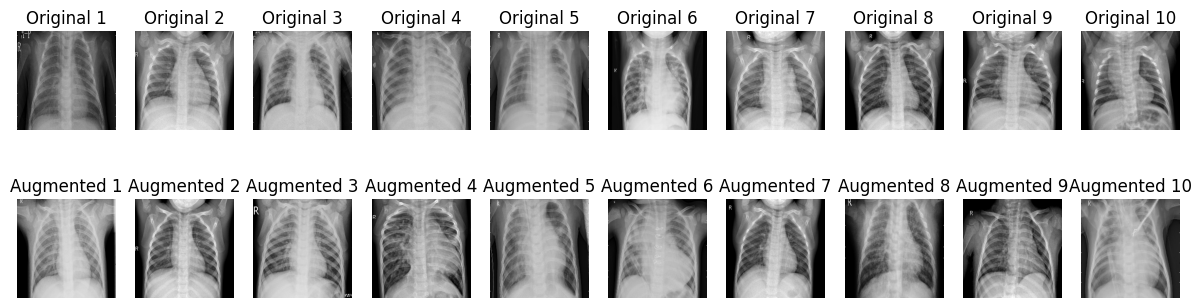

In [5]:
import matplotlib.pyplot as plt

num_images_to_display = 10

fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 4))

for i in range(num_images_to_display):
    axes[0, i].imshow(data_train[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {i+1}')

for i in range(num_images_to_display):
    axes[1, i].imshow(data_train[i+10])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Augmented {i+1}')

plt.show()

In [8]:
folder_path_test_normal = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/"
folder_path_test_pneumonia = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/"

folder_test_no = os.listdir(folder_path_test_normal)
folder_test_yes = os.listdir(folder_path_test_pneumonia)

print(len(folder_test_no))
print(len(folder_test_yes))

234
390


In [9]:
test_no_label = [0]*len(folder_test_no)
test_yes_label = [1]*len(folder_test_yes)
test_labels = test_no_label + test_yes_label
print(len(test_labels))

624


In [10]:
path_no = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/"
path_yes = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/"

img_width, img_height = 224, 224

datagen = ImageDataGenerator(rescale=1./255)

data_no = np.array([img_to_array(load_img(path_no + img, target_size=(img_width, img_height))) for img in os.listdir(path_no)])
data_yes = np.array([img_to_array(load_img(path_yes + img, target_size=(img_width, img_height))) for img in os.listdir(path_yes)])

labels_no = np.zeros(len(data_no))
labels_yes = np.ones(len(data_yes))

data_test = np.concatenate([data_no, data_yes])
labels_test = np.concatenate([labels_no, labels_yes])

data_test_shuffled, labels_test_shuffled = shuffle(data_test, labels_test, random_state=42)

In [11]:
data_test_normalised=data_test_shuffled/255.0

In [11]:
data.shape

(5216, 224, 224, 3)

In [12]:
data_test_normalised.shape

(624, 224, 224, 3)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_train, labels, test_size=0.2, random_state=42)
x_test = np.concatenate([x_val, data_test_normalised])
y_test = np.concatenate([y_val, labels_test_shuffled])

In [13]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (4172, 224, 224, 3)
Shape of y_train: (4172,)
Shape of x_test: (1668, 224, 224, 3)
Shape of y_test: (1668,)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

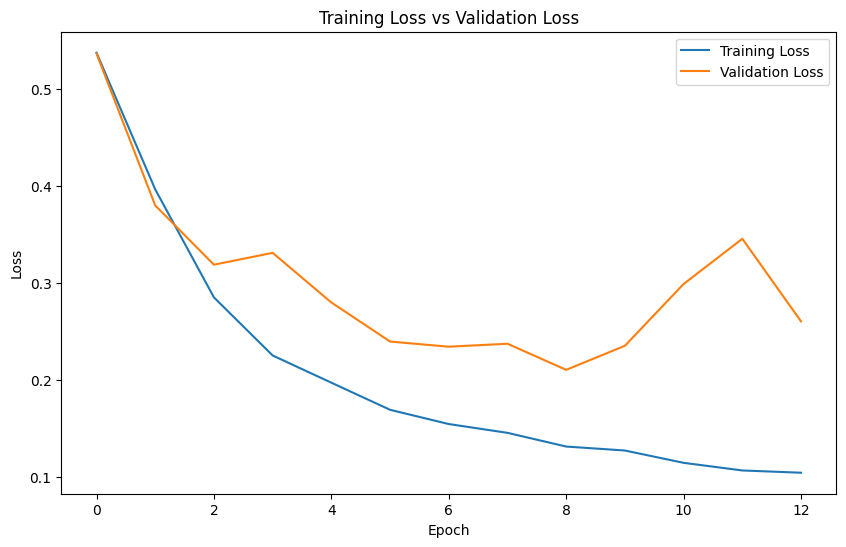

53/53 [==============================] - 1s 19ms/step - loss: 0.2105 - accuracy: 0.9191
Test Loss: 0.2105
Test Accuracy: 91.91%


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

-model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,y_train,
    epochs=30,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test,y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 128)      

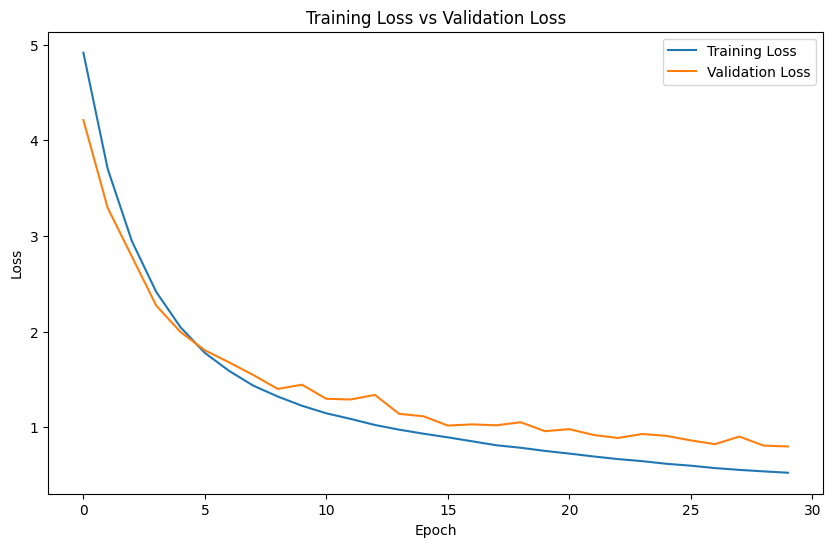

53/53 [==============================] - 1s 19ms/step - loss: 0.7995 - accuracy: 0.8987
Test Loss: 0.7995
Test Accuracy: 89.87%


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

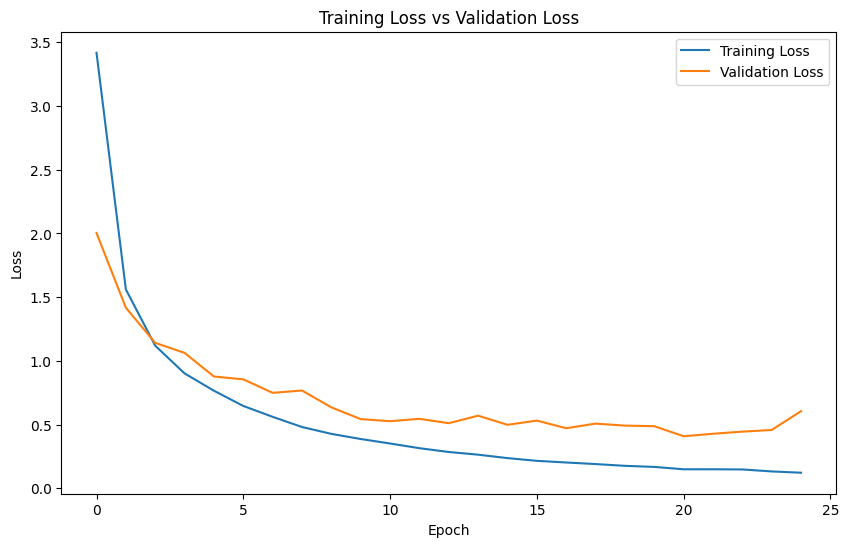

53/53 [==============================] - 1s 19ms/step - loss: 0.4078 - accuracy: 0.9089
Test Loss: 0.4078
Test Accuracy: 90.89%


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

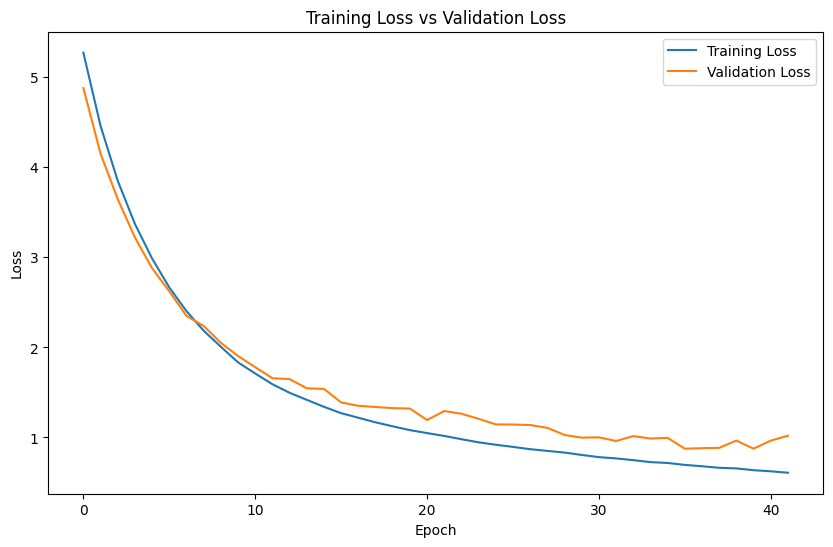

53/53 [==============================] - 1s 17ms/step - loss: 0.8752 - accuracy: 0.9131
Test Loss: 0.8752
Test Accuracy: 91.31%


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

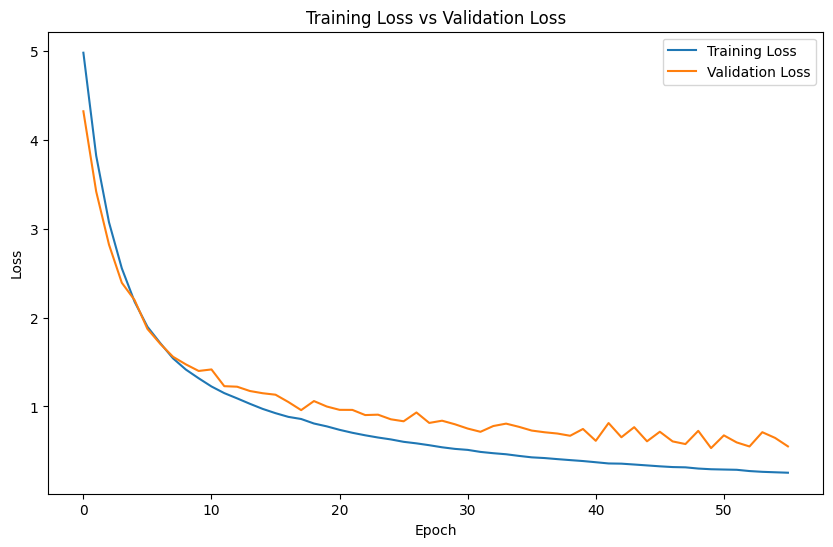

53/53 [==============================] - 1s 17ms/step - loss: 0.5309 - accuracy: 0.9137
Test Loss: 0.5309
Test Accuracy: 91.37%


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=60,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_6 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                      

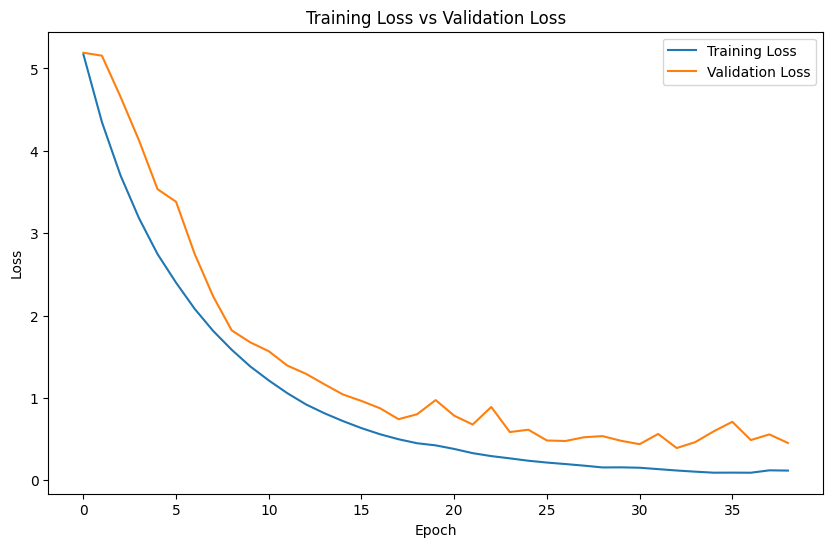

53/53 [==============================] - 1s 21ms/step - loss: 0.3915 - accuracy: 0.9125
Test Loss: 0.3915
Test Accuracy: 91.25%


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                      

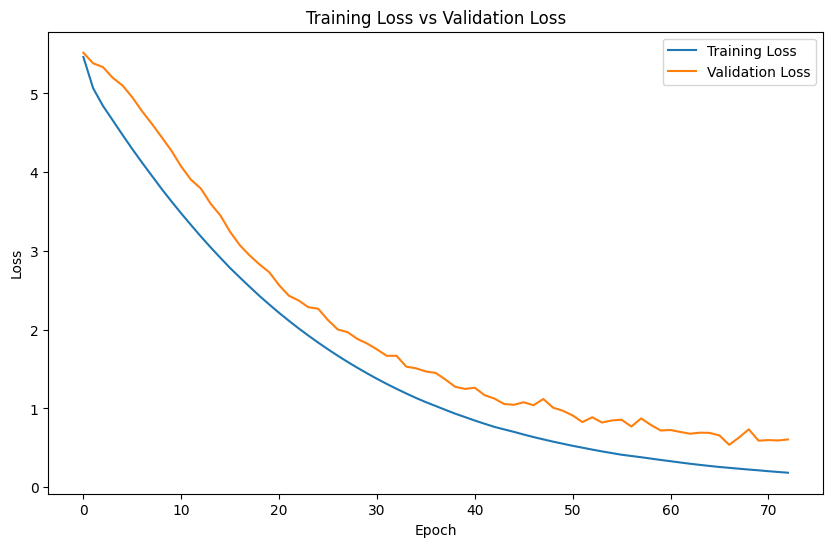

53/53 [==============================] - 1s 21ms/step - loss: 0.5378 - accuracy: 0.9119
Test Loss: 0.5378
Test Accuracy: 91.19%


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00002), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 222, 222, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 109, 109, 64)      0

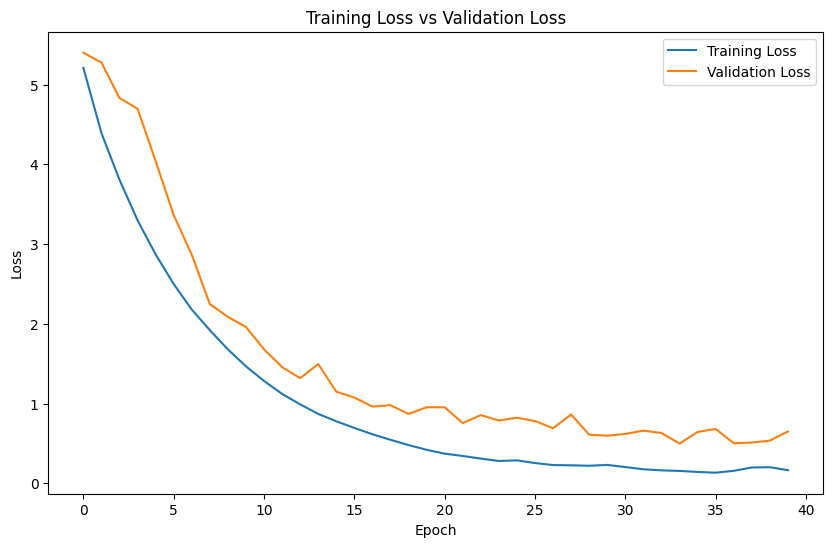

53/53 [==============================] - 2s 28ms/step - loss: 0.4978 - accuracy: 0.9089
Test Loss: 0.4978
Test Accuracy: 90.89%


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer=initializers.HeNormal(), input_shape=(224, 224, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer=initializers.HeNormal()))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer=initializers.HeNormal()))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
